In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import torch

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


len(trainloader)

Files already downloaded and verified
Files already downloaded and verified


12500

In [4]:
import matplotlib.pyplot as plt
import numpy as np

 bird  frog   cat horse


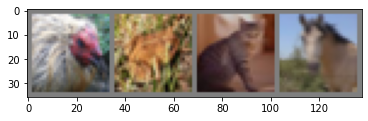

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지를 보여주기 위한 함수

num_workers=0
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# 학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [6]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()


In [7]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [8]:
for epoch in range(5):  # 데이터셋을 수차례 반복합니다.

    running_loss = 0.000
    for i, data in enumerate(trainloader, 0):
        # 입력을 받은 후,
        inputs, labels = data
        
        # Variable로 감싸고
        inputs, labels = Variable(inputs), Variable(labels)

        # 변화도 매개변수를 0으로 만든 후
        optimizer.zero_grad()

        # 학습 + 역전파 + 최적화
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 통계 출력
        
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.144
[1,  4000] loss: 1.800
[1,  6000] loss: 1.672
[1,  8000] loss: 1.574
[1, 10000] loss: 1.528
[1, 12000] loss: 1.476
[2,  2000] loss: 1.401
[2,  4000] loss: 1.388
[2,  6000] loss: 1.383
[2,  8000] loss: 1.345
[2, 10000] loss: 1.319
[2, 12000] loss: 1.308
[3,  2000] loss: 1.258
[3,  4000] loss: 1.216
[3,  6000] loss: 1.232
[3,  8000] loss: 1.213
[3, 10000] loss: 1.196
[3, 12000] loss: 1.195
[4,  2000] loss: 1.126
[4,  4000] loss: 1.132
[4,  6000] loss: 1.126
[4,  8000] loss: 1.102
[4, 10000] loss: 1.134
[4, 12000] loss: 1.110
[5,  2000] loss: 1.042
[5,  4000] loss: 1.041
[5,  6000] loss: 1.055
[5,  8000] loss: 1.028
[5, 10000] loss: 1.041
[5, 12000] loss: 1.066
Finished Training


torch.Size([4, 3, 32, 32])
GroundTruth:    cat  ship  ship plane


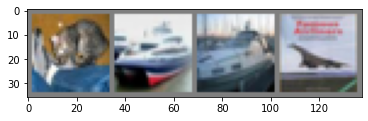

In [9]:
dataiter = iter(testloader)
images, labels = dataiter.next()

print(images.shape)
# 이미지 출력
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [10]:
outputs = net(Variable(images))

In [11]:
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship   car plane


In [12]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 61 %


In [13]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 75 %
Accuracy of   car : 84 %
Accuracy of  bird : 44 %
Accuracy of   cat : 30 %
Accuracy of  deer : 65 %
Accuracy of   dog : 46 %
Accuracy of  frog : 73 %
Accuracy of horse : 68 %
Accuracy of  ship : 69 %
Accuracy of truck : 58 %
